# NMIST CNN Features

Nesse tutorial, ilustramos os features resultantes da saída de cada camada da rede CNN aplicada ao dataset NMIST.

In [12]:
#Importando as bibliotecas necessárias
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import numpy as np

In [11]:
batch_size = 128
nb_classes = 10
nb_epoch = 12

# Dimensões das imagens
img_rows, img_cols = 28, 28
# Número de filtros convoluvionais
nb_filters = 32
# tamanho do max-pooling
pool_size = (2, 2)
# Tamanho dos kernels de convolução
kernel_size = (3, 3)

# Carregando os dados
(X_train, y_train), (X_test, y_test) = mnist.load_data()

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#Normalização dos dados
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Conversão para a representação one-hot-encoding
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

X_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 25s - loss: 0.3952 - acc: 0.8799 - val_loss: 0.1028 - val_acc: 0.9671
Epoch 2/12
60000/60000 [==============================] - 25s - loss: 0.1485 - acc: 0.9553 - val_loss: 0.0657 - val_acc: 0.9798
Epoch 3/12
60000/60000 [==============================] - 25s - loss: 0.1119 - acc: 0.9666 - val_loss: 0.0523 - val_acc: 0.9835
Epoch 4/12
60000/60000 [==============================] - 25s - loss: 0.0942 - acc: 0.9717 - val_loss: 0.0458 - val_acc: 0.9845
Epoch 5/12
60000/60000 [==============================] - 25s - loss: 0.0811 - acc: 0.9757 - val_loss: 0.0417 - val_acc: 0.9859
Epoch 6/12
60000/60000 [==============================] - 25s - loss: 0.0723 - acc: 0.9784 - val_loss: 0.0402 - val_acc: 0.9867
Epoch 7/12
60000/60000 [==============================] - 25s - loss: 0.0667 - acc: 0.9806 - val_loss: 0.0358

In [13]:
def mosaic(f,N):
    d,h,w = f.shape
    nLines = np.ceil(float(d)/N)
    nCells = nLines*N
        
    # Add black slices to match the exact number of mosaic cells
    fullf = np.resize(f, (nCells,h,w))
    fullf[d:nCells,:,:] = 0        
        
    Y,X = np.indices((nLines*h,N*w))
    Pts = np.array([
                   (np.floor(Y/h)*N + np.floor(X/w)).ravel(),
                   np.mod(Y,h).ravel(),
                   np.mod(X,w).ravel() ]).astype(int).reshape((3,int(nLines*h),int(N*w)))
    g = fullf[Pts[0],Pts[1],Pts[2]]
    return g

/home/adessowiki/Virtualenvs/theano/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


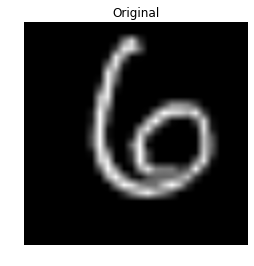

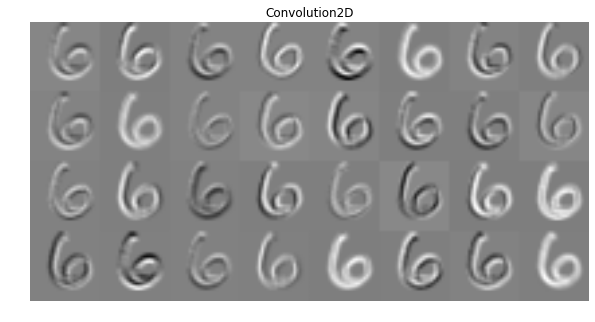

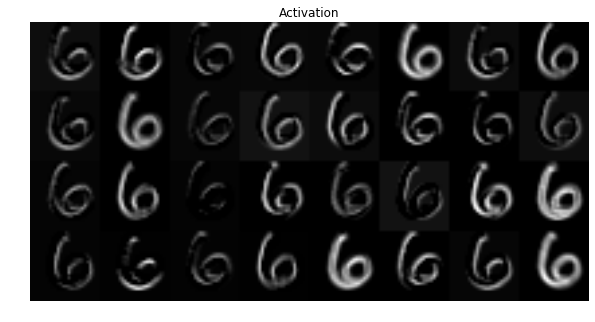

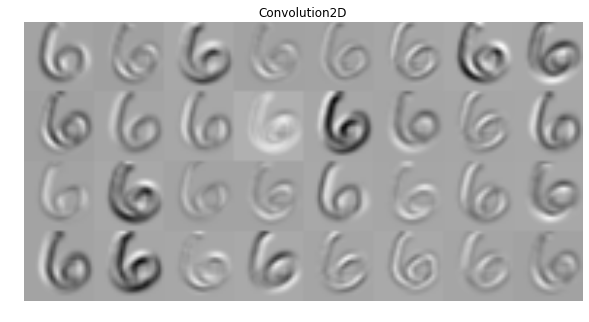

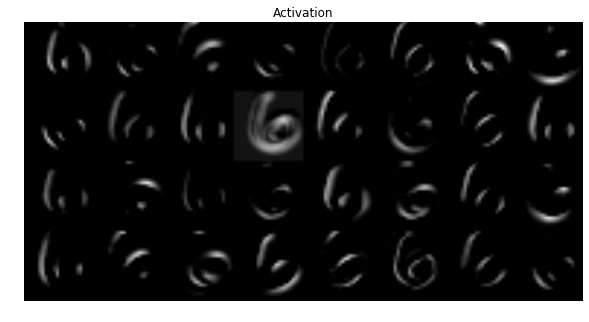

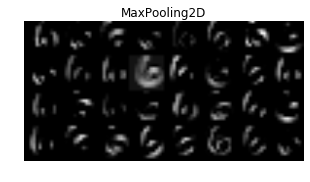

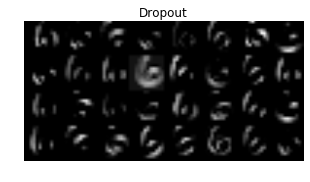

In [29]:
%matplotlib inline
import matplotlib.pylab as plt
from keras.models import Model
plt.figure()
plt.imshow(X_test[100,0,:,:],cmap = 'gray')
plt.axis('off')
plt.title("Original")
ncols = 8
H,W = 10,30
for layer in model.layers[:-6]:
    intermediate_layer_model = Model(input=model.input,output=layer.output)
    intermediate_output = intermediate_layer_model.predict(X_test[100].reshape(1,1,28,28))
    sub_dim = intermediate_output.shape[1]
    name = str(layer).split('.')[3].split(" ")[0]
    if name =="MaxPooling2D":
        H = H/2
        W = W/2
    fig =plt.figure(figsize=(H,W))
    aux = intermediate_output[0,:,:,:]
    mos = mosaic(aux,ncols)
    plt.imshow(mos,cmap = 'gray')
    plt.axis('off')
    plt.title(name)
